<a href="https://colab.research.google.com/github/Anikethb05/Quantum-Computing/blob/main/density_matrices_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install qiskit qiskit-aer pylatexenc

In [ ]:
from qiskit.quantum_info import DensityMatrix, Statevector, partial_trace
import numpy as np
from qiskit.visualization import plot_state_city
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def calculate_purity(rho):
  rho_squared=rho.data @ rho.data
  purity=np.trace(rho_squared)
  return purity

#### Pure State

In [ ]:
rho_pure=DensityMatrix.from_label('0')
purity_calculated=calculate_purity(rho_pure)
purity_builtin=rho_pure.purity()
print(f"|0> : Calculated Purity = {purity_calculated:.6f}")
Built_in=rho_pure.purity()
print(f"|0> : Built-in Purity = {Built_in:.6f}")

|0> : Calculated Purity = 1.000000+0.000000j
|0> : Built-in Purity = 1.000000+0.000000j


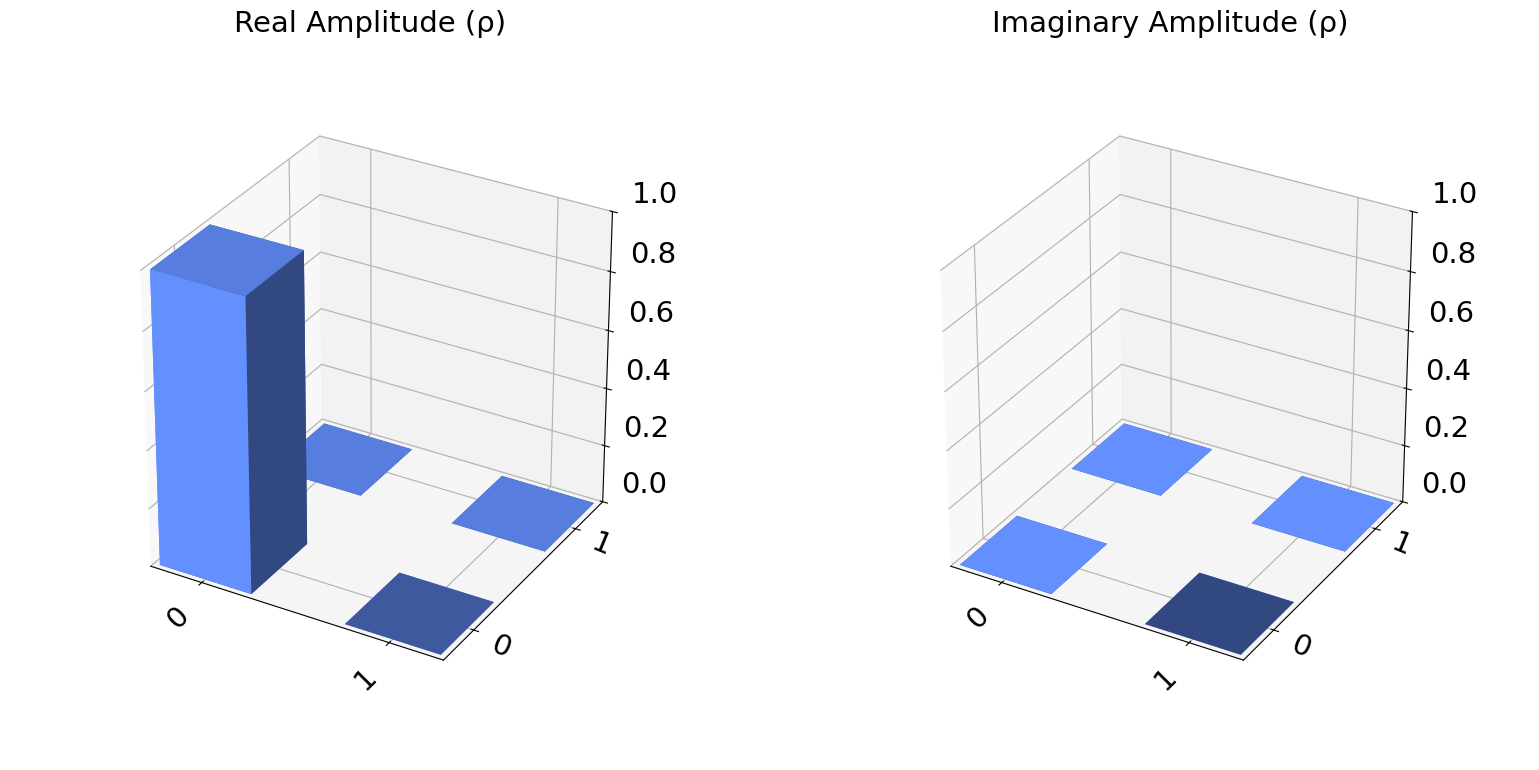

In [ ]:
plot_state_city(rho_pure)

#### Mixed State

In [ ]:
rho_0=DensityMatrix.from_label('0')
rho_1=DensityMatrix.from_label('1')
rho_mixed=0.6*rho_0+0.4*rho_1
purity_calculated=calculate_purity(rho_mixed)
purity_builtin=rho_mixed.purity()
print(f"|0> : Calculated Purity = {purity_calculated:.6f}")
Built_in=rho_mixed.purity()
print(f"|0> : Built-in Purity = {Built_in:.6f}")

|0> : Calculated Purity = 0.520000+0.000000j
|0> : Built-in Purity = 0.520000+0.000000j


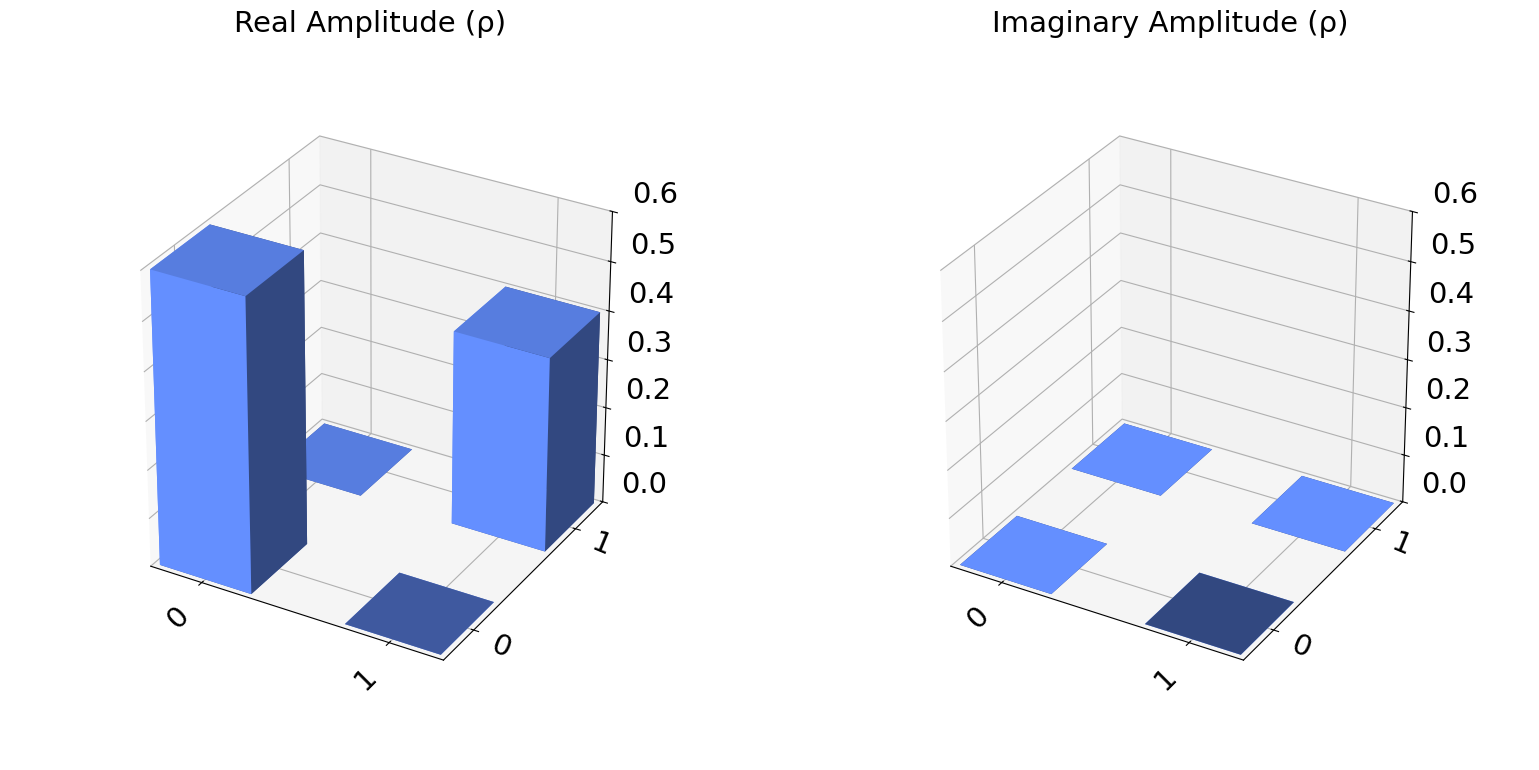

In [ ]:
plot_state_city(rho_mixed)

In [ ]:
def entanglement_create_mixed_states():
  qc=QuantumCircuit(2)
  qc.h(0)
  qc.cx(0,1)
  bell_state=Statevector.from_instruction(qc)
  rho_bell=DensityMatrix(bell_state)

  print(f"Bell State purity : {rho_bell.purity():.3f}")

  #Trace out qubit 1 - we get MIXED STATE for qubit 0
  rho_qubit0=partial_trace(rho_bell,[1])
  print(f"Qubit 0 purity after partial trace : {rho_qubit0.purity():.3f}") # 0.5

  #Trace out qubit 0 - we get MIXED STATE for qubit 1
  rho_qubit1=partial_trace(rho_bell,[0])
  print(f"Qubit 1 purity after partial trace : {rho_qubit1.purity():.3f}") # 0.5

In [ ]:
entanglement_create_mixed_states()

Bell State purity : 1.000+0.000j
Qubit 0 purity after partial trace : 0.500+0.000j
Qubit 1 purity after partial trace : 0.500+0.000j


In [ ]:

# Create superposition state |+⟩ = (|0⟩ + |1⟩)/√2
psi_plus = Statevector.from_label('+')
rho_plus = DensityMatrix(psi_plus)
print(f"Initial |+⟩ state purity: {rho_plus.purity():.3f}")  # Should be 1.0 (pure)

# After measurement (Z-basis), we either get |0⟩ or |1⟩ with 50% probability each
# If we don't know the measurement outcome, the system becomes a mixed state
rho_after_measurement = 0.5 * DensityMatrix.from_label('0') + 0.5 * DensityMatrix.from_label('1')

print(f"After unknown Z-measurement purity: {rho_after_measurement.purity():.3f}")  # Should be 0.5 (mixed)
print("Before knowing measurement result, our best description is mixed!")






Initial |+⟩ state purity: 1.000+0.000j
After unknown Z-measurement purity: 0.500+0.000j
Before knowing measurement result, our best description is mixed!


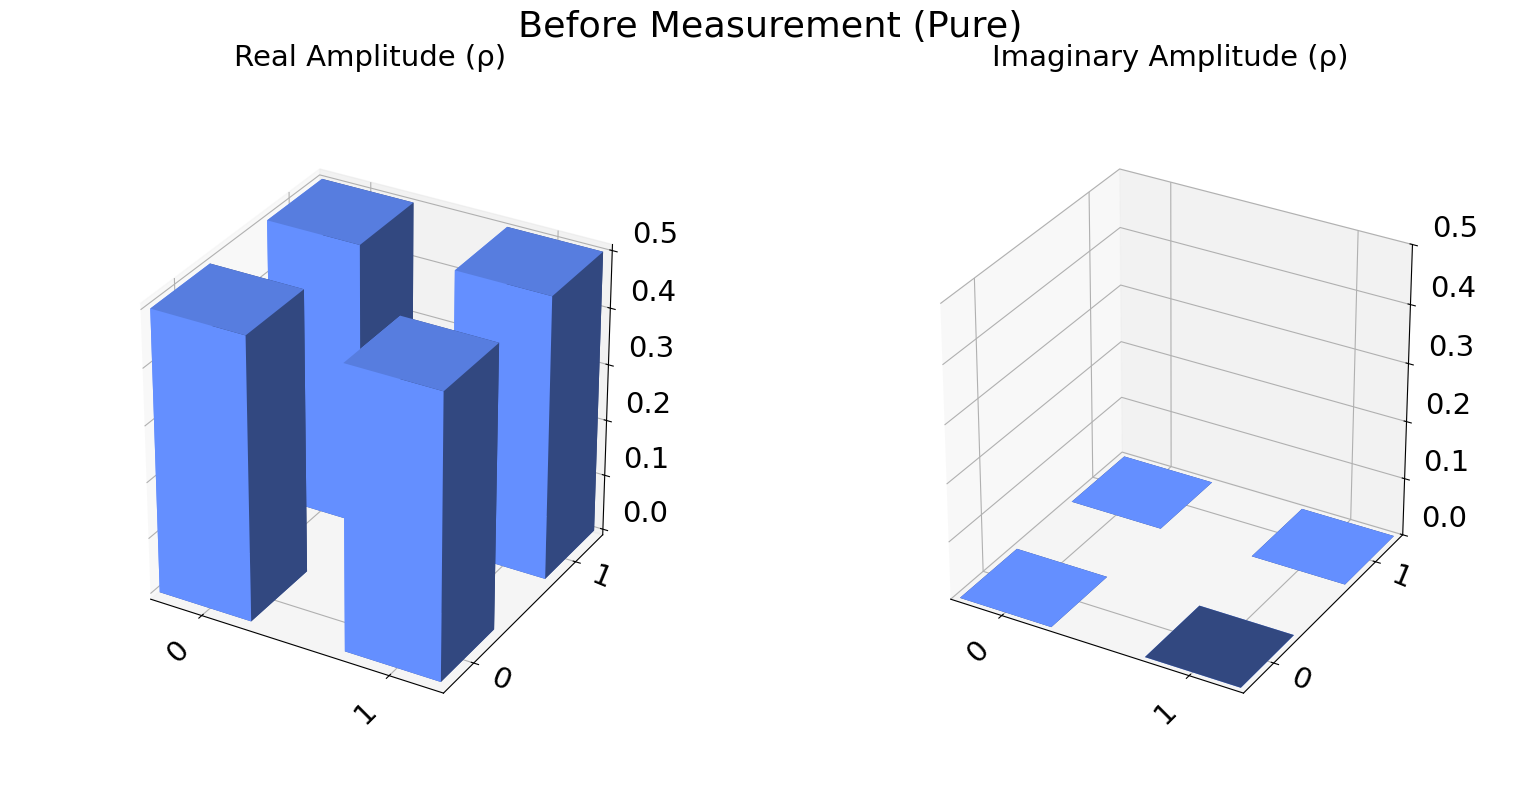

In [ ]:
# Visualize the difference between pure and mixed state
plot_state_city(rho_plus, title="Before Measurement (Pure)")


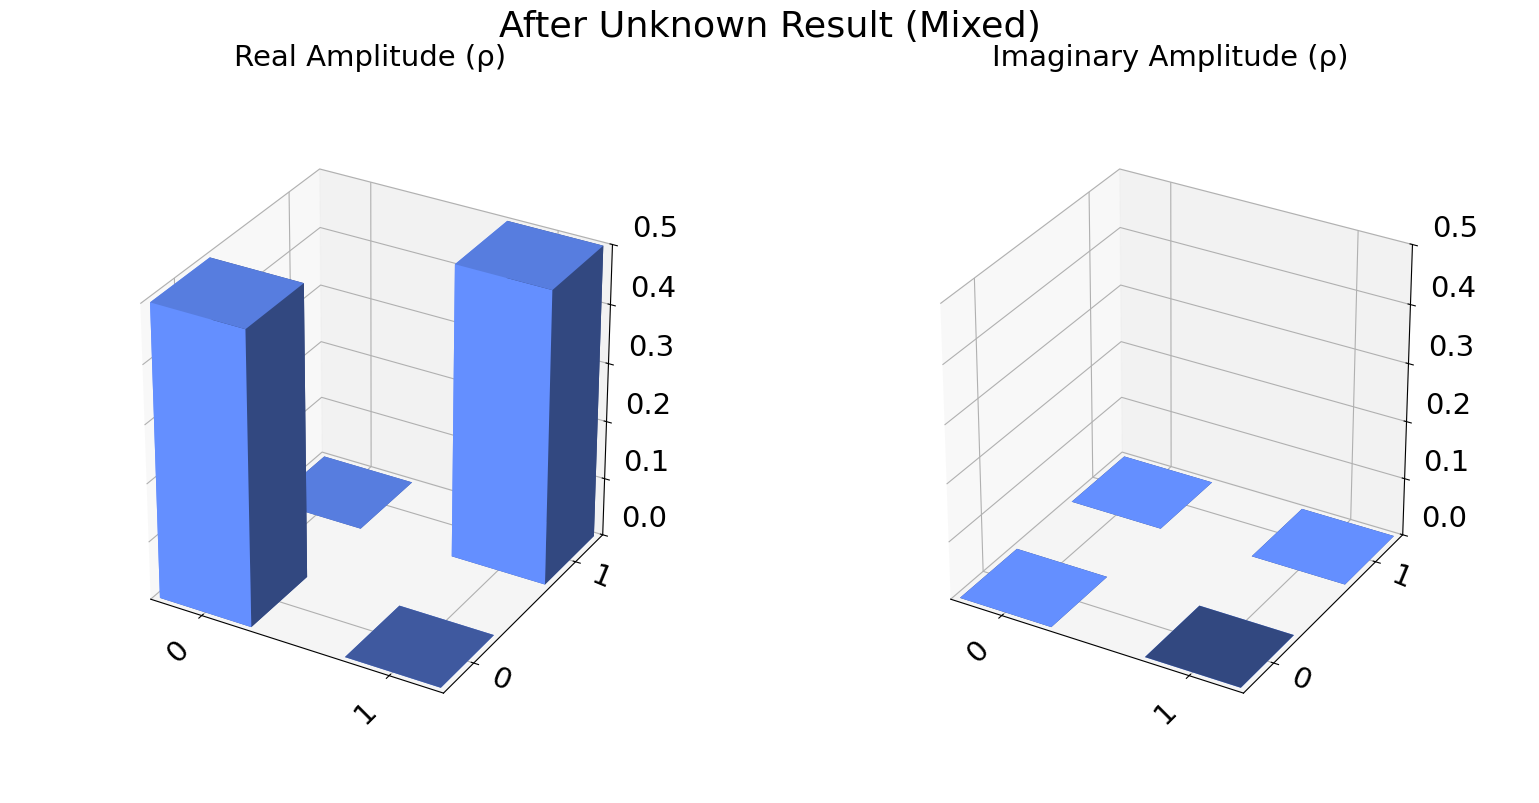

In [ ]:
plot_state_city(rho_after_measurement, title="After Unknown Result (Mixed)")